In [1]:
from two_leads_ZBW import get_H, get_state_dot_charge, to_label, get_state_spin
import matplotlib.pyplot as plt
import numpy as np

C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2844744109.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  res_phi0[i][j] = get_state_dot_charge(_v)
C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2844744109.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  res_phi1[i][j] = get_state_dot_charge(_v)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2844744109.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


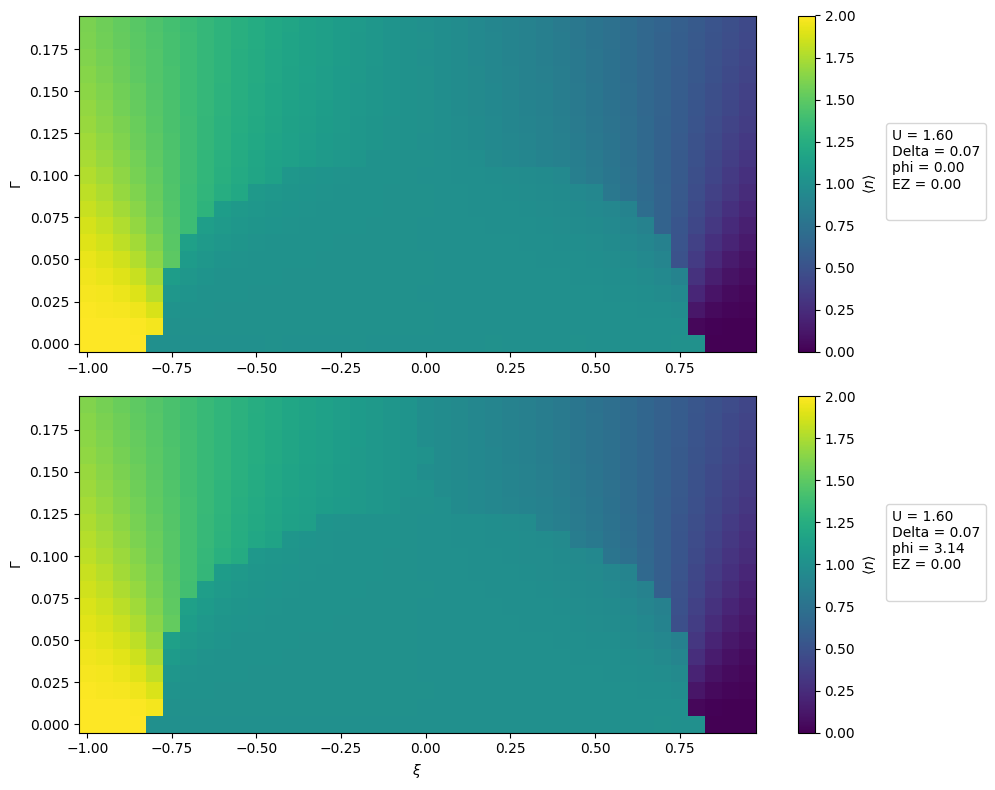

In [2]:
# All of these are "unitless" in the same way, for example these parameters in meV from Lazar's paper
U = 1.6
Delta = 72e-3

phi0 = 0
phi1 = np.pi

E_Z = 0.02 # This is just to have spin splitting


fig, ax = plt.subplots(2, figsize=(10, 8))

title = f"{U}U_{Delta}D_EZ{E_Z}_v0"
pc0_params = {"U": U, "Delta": Delta, "phi": phi0, "EZ": E_Z}
pc1_params = {"U": U, "Delta": Delta, "phi": phi1, "EZ": E_Z}

# Ranges for 2D sweep
g_arr = np.arange(0, 1, 0.05) * 0.2
xi_arr = np.arange(-1, 1, 0.05)


res_phi0 = np.empty((g_arr.size, xi_arr.size))
res_phi1 = np.empty((g_arr.size, xi_arr.size))

for i, _g in enumerate(g_arr):
    for j, _xi in enumerate(xi_arr):
        _xi = _xi - U/2

        _H = get_H(phi0, _xi, _g, U, Delta, E_Z)
        evals, evecs = np.linalg.eigh(_H)
        _v = evecs[:,0] # Take the smallest eigenvalue eigenvector - ground state            
        res_phi0[i][j] = get_state_dot_charge(_v)

        _H = get_H(phi1, _xi, _g, U, Delta, E_Z)
        evals, evecs = np.linalg.eigh(_H)
        _v = evecs[:,0] # Take the smallest eigenvalue eigenvector - ground state
        res_phi1[i][j] = get_state_dot_charge(_v)


pc0 = ax[0].pcolormesh(xi_arr, g_arr, res_phi0)
pc1 = ax[1].pcolormesh(xi_arr, g_arr, res_phi1)

ax[0].legend(bbox_to_anchor=(1.35, 0.7), title=to_label(pc0_params))
ax[1].legend(bbox_to_anchor=(1.35, 0.7), title=to_label(pc1_params))

ax[0].set_ylabel(r"$\Gamma$")
ax[1].set_ylabel(r"$\Gamma$")
ax[1].set_xlabel(r"$\xi$")

fig.colorbar(pc0, label=r"$\langle n \rangle$")
fig.colorbar(pc1, label=r"$\langle n \rangle$")
plt.tight_layout()
fig.show()

C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2582281634.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  res_phi0[i][j] = get_state_spin(_v)
C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2582281634.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  res_phi1[i][j] = get_state_spin(_v)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nbr720\AppData\Local\Temp\ipykernel_12312\2582281634.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


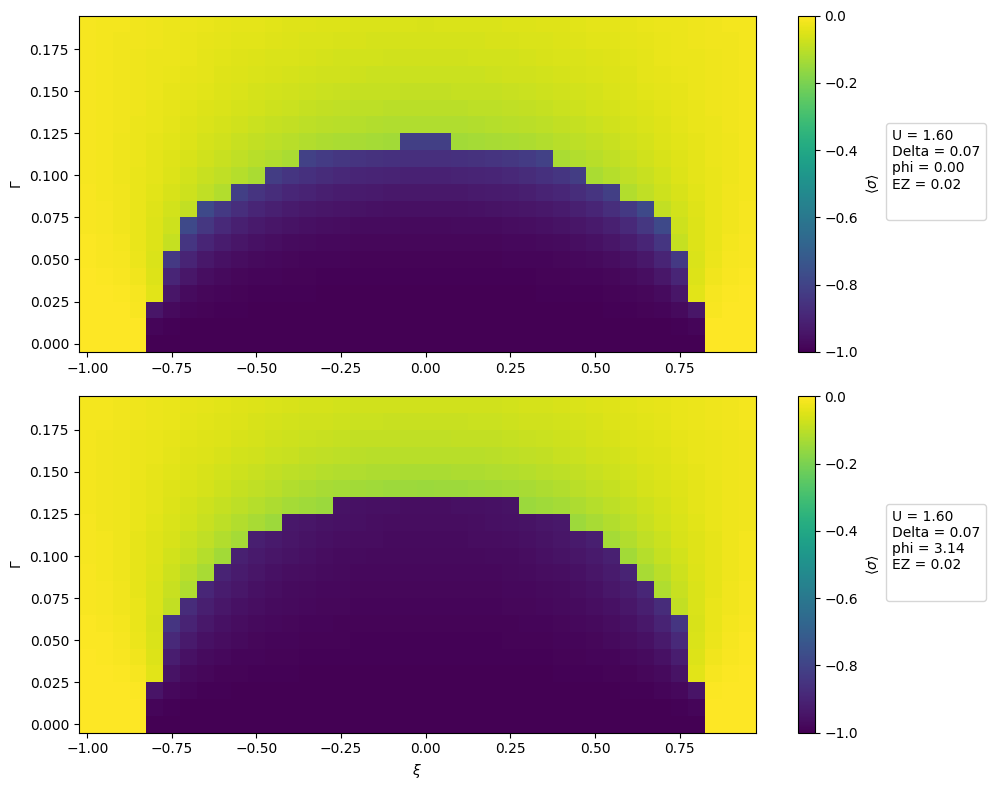

In [4]:
# All of these are "unitless" in the same way, for example these parameters in meV from Lazar's paper
U = 1.6
Delta = 72e-3

phi0 = 0
phi1 = np.pi

E_Z = 0.02 # This is just to have spin splitting


fig, ax = plt.subplots(2, figsize=(10, 8))

title = f"{U}U_{Delta}D_EZ{E_Z}_v0"
pc0_params = {"U": U, "Delta": Delta, "phi": phi0, "EZ": E_Z}
pc1_params = {"U": U, "Delta": Delta, "phi": phi1, "EZ": E_Z}

# Ranges for 2D sweep
g_arr = np.arange(0, 1, 0.05) * 0.2
xi_arr = np.arange(-1, 1, 0.05)


res_phi0 = np.empty((g_arr.size, xi_arr.size))
res_phi1 = np.empty((g_arr.size, xi_arr.size))

for i, _g in enumerate(g_arr):
    for j, _xi in enumerate(xi_arr):
        _xi = _xi - U/2

        _H = get_H(phi0, _xi, _g, U, Delta, E_Z)
        evals, evecs = np.linalg.eigh(_H)
        _v = evecs[:,0] # Take the smallest eigenvalue eigenvector - ground state            
        res_phi0[i][j] = get_state_spin(_v)

        _H = get_H(phi1, _xi, _g, U, Delta, E_Z)
        evals, evecs = np.linalg.eigh(_H)
        _v = evecs[:,0] # Take the smallest eigenvalue eigenvector - ground state
        res_phi1[i][j] = get_state_spin(_v)


pc0 = ax[0].pcolormesh(xi_arr, g_arr, res_phi0)
pc1 = ax[1].pcolormesh(xi_arr, g_arr, res_phi1)

ax[0].legend(bbox_to_anchor=(1.35, 0.7), title=to_label(pc0_params))
ax[1].legend(bbox_to_anchor=(1.35, 0.7), title=to_label(pc1_params))

ax[0].set_ylabel(r"$\Gamma$")
ax[1].set_ylabel(r"$\Gamma$")
ax[1].set_xlabel(r"$\xi$")

fig.colorbar(pc0, label=r"$\langle \sigma \rangle$")
fig.colorbar(pc1, label=r"$\langle \sigma \rangle$")
plt.tight_layout()
fig.show()

## Phi Sweeps

Taking the same parameters as the previous plots, choosing a spot of xi, gamma

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


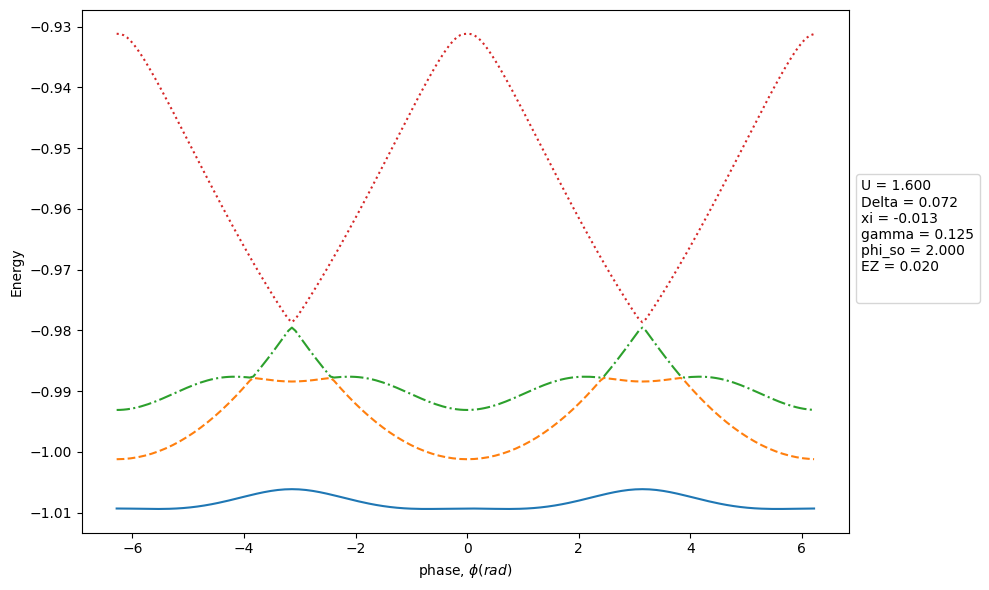

In [13]:
# All of these are "unitless" in the same way, for example these parameters in meV from Lazar's paper
U = 1.6
Delta = 72e-3
E_Z = 0.02
phi_so = 0.0 # "angle" of spin orbit interaction, 0 - no SO, 6.14 - only spin flip tunneling

# Choosing a point where the ground state changes
xi = -0.0125
gamma = 0.125

# Plot helpers
pc_params = {"U": U, "Delta": Delta, "xi": xi, "gamma": gamma, "phi_so": phi_so, "EZ": E_Z}
lsss = ["-", "--", "-.", ":"]

# Phi sweep
Phis = np.arange(-2, 2, 0.02) * np.pi

states = [list() for _ in range(4)] # The number of states to plot
for p in Phis:
    _xi = xi - U/2
    _H = get_H(p, _xi, gamma, U, Delta, E_Z, phi_so)
    
    evals, evecs = np.linalg.eigh(_H)

    for i in range(len(states)):
        states[i].append(evals[i])


plt.figure(figsize=(10, 6))

for i, s in enumerate(states):
    plt.plot(Phis, s, ls=lsss[i])

plt.xlabel(r"phase, $\phi (rad)$")
plt.ylabel(r"Energy")
plt.legend(title=to_label(pc_params), bbox_to_anchor=(1.0, 0.7))
plt.tight_layout()